# **3D Printing AI Assistants**


___

## **Installation of Dependencies**

In this code cell, we are installing and upgrading the necessary Python packages for the project. The `openai` package, `transformers` package, and `langchain` package are being installed or upgraded to ensure we have the latest versions for seamless integration and utilization in the project.

*   **openai**:

  `openai` Python package is essential for interfacing with the OpenAI API, enabling interactions and queries related to natural language processing tasks.
*   **transformers**:

   `transformers` is a widely-used library for natural language processing and deep learning, providing a collection of pre-trained models and various tools to work with them.
* **langchain**:
  
  The `langchain` Python package, is a critical component for language-related processing in the project. 'langchain' likely facilitates language processing tasks and aids in the development of the 3D printing AI assistant.

In [ ]:
# Suppressing output
%%capture
!pip install --upgrade openai         # Installing or upgrading the 'openai' Python package
!pip install --upgrade transformers   # Installing or upgrading the 'transformers' Python package
!pip install --upgrade langchain      # Installing or upgrading the 'langchain' Python package


## **Importing and Customizing CSS Styles**

We import necessary functions from `IPython.display` to work with HTML and define a function `set_css()` that sets custom CSS styles for the Jupyter Notebook. The custom styles, applied using HTML, include preserving white spaces and wrapping content within the `pre` HTML tag. Additionally, a callback is registered to apply these custom CSS styles before running a cell, enhancing the visual display of the code and text in the notebook.


In [ ]:
# Importing necessary functions from IPython.display
from IPython.display import HTML, display

# Function to set custom CSS styles for the Jupyter Notebook
def set_css():
    # Display HTML with custom CSS styles
    display(HTML('''
    <style>
        pre {
            white-space: pre-wrap;  # Preserve white spaces and wrap content
        }
    </style>
    '''))

# Registering a callback to apply the custom CSS styles before running a cell
get_ipython().events.register('pre_run_cell', set_css)


## **Importing Necessary Libraries**

In this section, we import the essential Python libraries required for our 3D printing AI assistant project. The libraries include:

- `os`: Operating system-dependent functionality
- `openai`: OpenAI Python library for interacting with the OpenAI API
- `IPython`: Provides a rich toolkit to enhance Python interactive usage
- `base64`: Allows decoding of Base64 encoded data
- `PIL (Pillow)`: Python Imaging Library used for image processing
- `cv2`: OpenCV library for computer vision tasks
- `cv2_imshow`: Patched OpenCV `imshow` function for Google Colab
- `numpy`: NumPy, a powerful N-dimensional array object for numerical computing
- `io`: Input/output functions for working with streams
- `transformers`: A library for using pre-trained models in natural language processing (NLP)
- `langchain`: A library for generating text using various language models
- `ChatOpenAI`: A model from langchain for text generation
- OpenAI API key for authentication: `key`


In [ ]:
import os                                   # Operating system dependent functionality
import openai                               # OpenAI Python library for interacting with OpenAI API
import IPython                              # IPython provides a rich toolkit to help you make the most out of using Python interactively
from base64 import b64decode                # Decodes Base64 encoded data
from PIL import Image                       # Python Imaging Library for image processing
import cv2                                  # OpenCV library for computer vision tasks
from google.colab.patches import cv2_imshow # Patched OpenCV imshow function for Google Colab
import numpy as np                          # NumPy, a powerful N-dimensional array object
import io                                   # Input/output functions for working with streams

# Transformers library for using pre-trained models in NLP
from transformers import pipeline

# Langchain library for generating text using various models
from langchain import PromptTemplate, LLMChain, OpenAI
from langchain.chat_models import ChatOpenAI


# OpenAI API key for authentication
key = "<OpenAI API Key>"
openai.api_key = key  # Set the API key for OpenAI authentication


## **Function Descriptions**

### `stringToRGB(base64_string)`
This function converts a base64 encoded string representing an image to an OpenCV image. It decodes the base64 string, opens the image using the Python Imaging Library (PIL), and then converts it to OpenCV format.

### `generate_advice(scenario)`
This function generates pieces of advice based on a given scenario. It uses a template to structure the advice, starting with the provided scenario. The story revolves around being a model designer for 3D printing, offering designing advice, 3D printing advice, and pointing out important considerations related to the scenario. The function suggests the best material for printing, the optimal printer model, and provides an estimated cost, all within concise explanations not exceeding 100 words.


In [ ]:
# Function to convert a base64 string to an OpenCV image
def stringToRGB(base64_string):
    imgdata = b64decode(str(base64_string))                       # Decode the base64 string
    img = Image.open(io.BytesIO(imgdata))                         # Open the image using PIL
    opencv_img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)   # Convert the image to OpenCV format
    return opencv_img

# Function to generate a story based on a given scenario
def generate_advice(scenario):
    # Template for the story generation using a given scenario
    template = """
    you are a model designer for 3D printing;
    you can generate designing advice and 3D printing advice. additionally,  point important considerations based on the given scenario.
    Suggest the 1-material for printing, 2-best printer model and 3-the estimation cost.
    the explanations should be no more than 100 words.
    start by: in this senario ;

    CONTEXT: {scenario}
    STORY:
    """

    # Create a prompt template with the scenario as an input variable
    prompt = PromptTemplate(template=template, input_variables=["scenario"])

    # Initialize a language model chain for story generation using GPT-3.5 Turbo
    story_llm = LLMChain(llm=ChatOpenAI(model_name="gpt-3.5-turbo", temperature=1, openai_api_key=key), prompt=prompt, verbose=False)

    # Generate the story based on the given scenario using the language model
    story = story_llm.predict(scenario=scenario)
    print(story)  # Print the generated story
    return story  # Return the generated story


## **Image Generation Constants and Prompt**

We define constants related to image generation for our 3D printing AI assistant project. The `NUMBER_OF_IMAGES` specifies the desired number of images to generate, and `IMAGE_SIZE` defines the dimensions (width and height) of the generated images. The `PROMPT` provides the initial instruction for image generation related to a valve for controlling high pressure gas flow.

## Image Generation Process

This part of the code demonstrates the process of generating an image using the OpenAI API. The `prompt` for image generation is constructed by combining the initial `PROMPT` with additional instructions related to creating a basic sketch for 3D printing. The number of images to generate and the desired image size are provided as parameters to the API call. The response format is specified to be in base64 encoded JSON.

## Displaying the Generated Image

We utilize OpenCV to display the generated image obtained from the OpenAI API response. The generated image is converted from base64 encoded data to an image format and displayed using the `cv2_imshow` function.


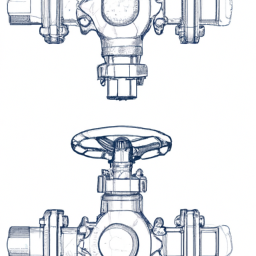

In [ ]:
# Constants for image generation
NUMBER_OF_IMAGES = 1  # Number of images to generate
IMAGE_SIZE = '256'    # Image size (both width and height)

# Prompt for generating the image
PROMPT = "valve for controlling high pressure gas flow"

# Generating the image using OpenAI API
response = openai.Image.create(
    prompt=f'{PROMPT} basic sketch for 3D printing',    # Combine the prompt with additional instructions
    n=NUMBER_OF_IMAGES,                                 # Number of images to generate
    size=f'{IMAGE_SIZE}x{IMAGE_SIZE}',                  # Image size
    response_format="b64_json"                          # Response format to get base64 encoded image data
)

# Display the generated image using OpenCV
cv2_imshow(stringToRGB(response['data'][0]['b64_json']))


## **Generating Image Variations**

In this section, we generate multiple image variations based on the initial image response obtained from the AI model. We utilize the OpenAI API to create variations of the image. The `n` parameter controls the number of image variations to generate, and we specify the desired image size using the `IMAGE_SIZE` variable. The response format is set to retrieve the image data in base64 encoded format.


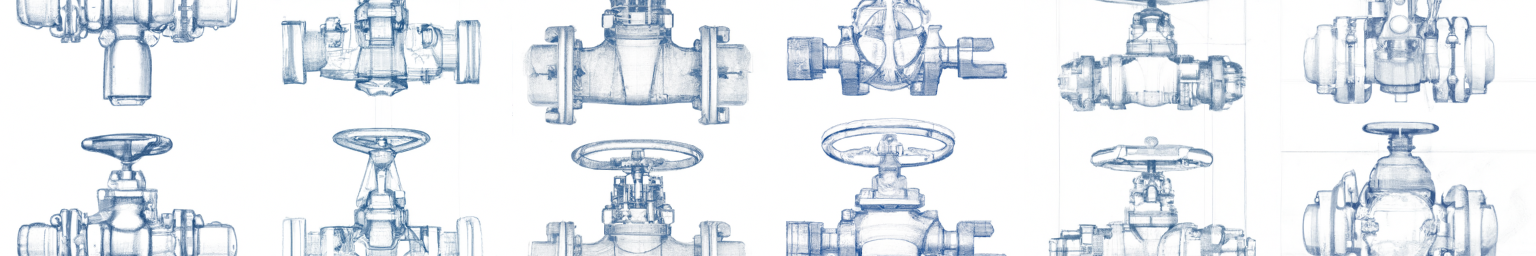

In [ ]:
# Generating image variations based on the initial image response
response_Variation = openai.Image.create_variation(
    image=b64decode(response['data'][0]['b64_json']), # Original image data in base64 decoded format
    n=6,                                              # Number of image variations to generate
    size=f'{IMAGE_SIZE}x{IMAGE_SIZE}',                # Image size for variations
    response_format="b64_json"                        # Response format to get base64 encoded image data
)

# Concatenate image variations vertically
Verti = np.concatenate(
    (stringToRGB(response_Variation['data'][0]['b64_json']),
     stringToRGB(response_Variation['data'][1]['b64_json']),
     stringToRGB(response_Variation['data'][2]['b64_json']),
     stringToRGB(response_Variation['data'][3]['b64_json']),
     stringToRGB(response_Variation['data'][4]['b64_json']),
     stringToRGB(response_Variation['data'][5]['b64_json'])),
    axis=1  # Concatenate along the horizontal axis
)

# Display the vertically concatenated image using OpenCV
cv2_imshow(Verti)


## **Generating advice**
The `generate_advice` function is being called with a specified prompt represented by the variable `PROMPT`. The result of this function call, representing a generated story, is assigned to the variable 'story'.


In [ ]:
# Calling the generate_story function with the provided prompt
story = generate_advice(PROMPT)

In this scenario, for designing a valve for controlling high pressure gas flow, I would suggest using a material like stainless steel due to its high strength, corrosion resistance, and suitability for high-pressure applications.

For the best printer model, I would recommend a high-quality industrial-grade 3D printer such as the Ultimaker S5. It offers excellent precision, reliable performance, and the ability to handle complex geometries necessary for a functional valve.

The estimation cost for 3D printing such a valve would depend on the size and complexity of the design. However, considering the material and printer model, the cost can range from $50 to $200, providing a cost-effective solution compared to traditional manufacturing methods.
